<a href="https://colab.research.google.com/github/meenamahanth/DataScience/blob/main/Data_Analysis_CSV_EXCEL/Hotel_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
matplotlib.use('Agg')
%matplotlib inline
# Model Buliding libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler

sns.set(style = 'whitegrid')

Add the hotel_booking.csv in the files tab you can get it from the below link

In [ ]:
df = pd.read_csv('hotel_booking.csv')  # https://github.com/meenamahanth/DataScience/blob/main/Data_Analysis_CSV_EXCEL/hotel_booking.csv

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [ ]:
df.shape

(119390, 36)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [ ]:
missing_values = df.isnull().sum()
print(missing_values[missing_values>0])

children         4
country        488
agent        16340
company     112593
dtype: int64


In [ ]:
df['reservation_status_date']  # it is in the object datatype so converting it into date type

,reservation_status_date
0,2015-07-01
1,2015-07-01
2,2015-07-02
3,2015-07-02
4,2015-07-03
...,...
119385,2017-09-06
119386,2017-09-07
119387,2017-09-07
119388,2017-09-07


In [ ]:
try:
  df['reservation_status_date'] = pd.to_datatime(df['reservation_status_date'], error='coerce')
  print(df['reservation_status_date'])
except Exception as e:
  print("Error in conveting the resevation_status_date to datatime:",e)

Error in conveting the resevation_status_date to datatime: module 'pandas' has no attribute 'to_datatime'


In [ ]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

Dropping the company column as it has the huge no of the missing values

In [ ]:
# Dropping the company column as it has the huge no of the missing values
df.drop(['company','agent'], axis=1, inplace=True)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [ ]:
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0,342,2015,27,1,0,0,2,0.0,0,0,0,0,3,0,0.0,0,0
1,0,737,2015,27,1,0,0,2,0.0,0,0,0,0,4,0,0.0,0,0
2,0,7,2015,27,1,0,1,1,0.0,0,0,0,0,0,0,75.0,0,0
3,0,13,2015,27,1,0,1,1,0.0,0,0,0,0,0,0,75.0,0,0
4,0,14,2015,27,1,0,2,2,0.0,0,0,0,0,0,0,98.0,0,1


In [ ]:
df_numeric.columns

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

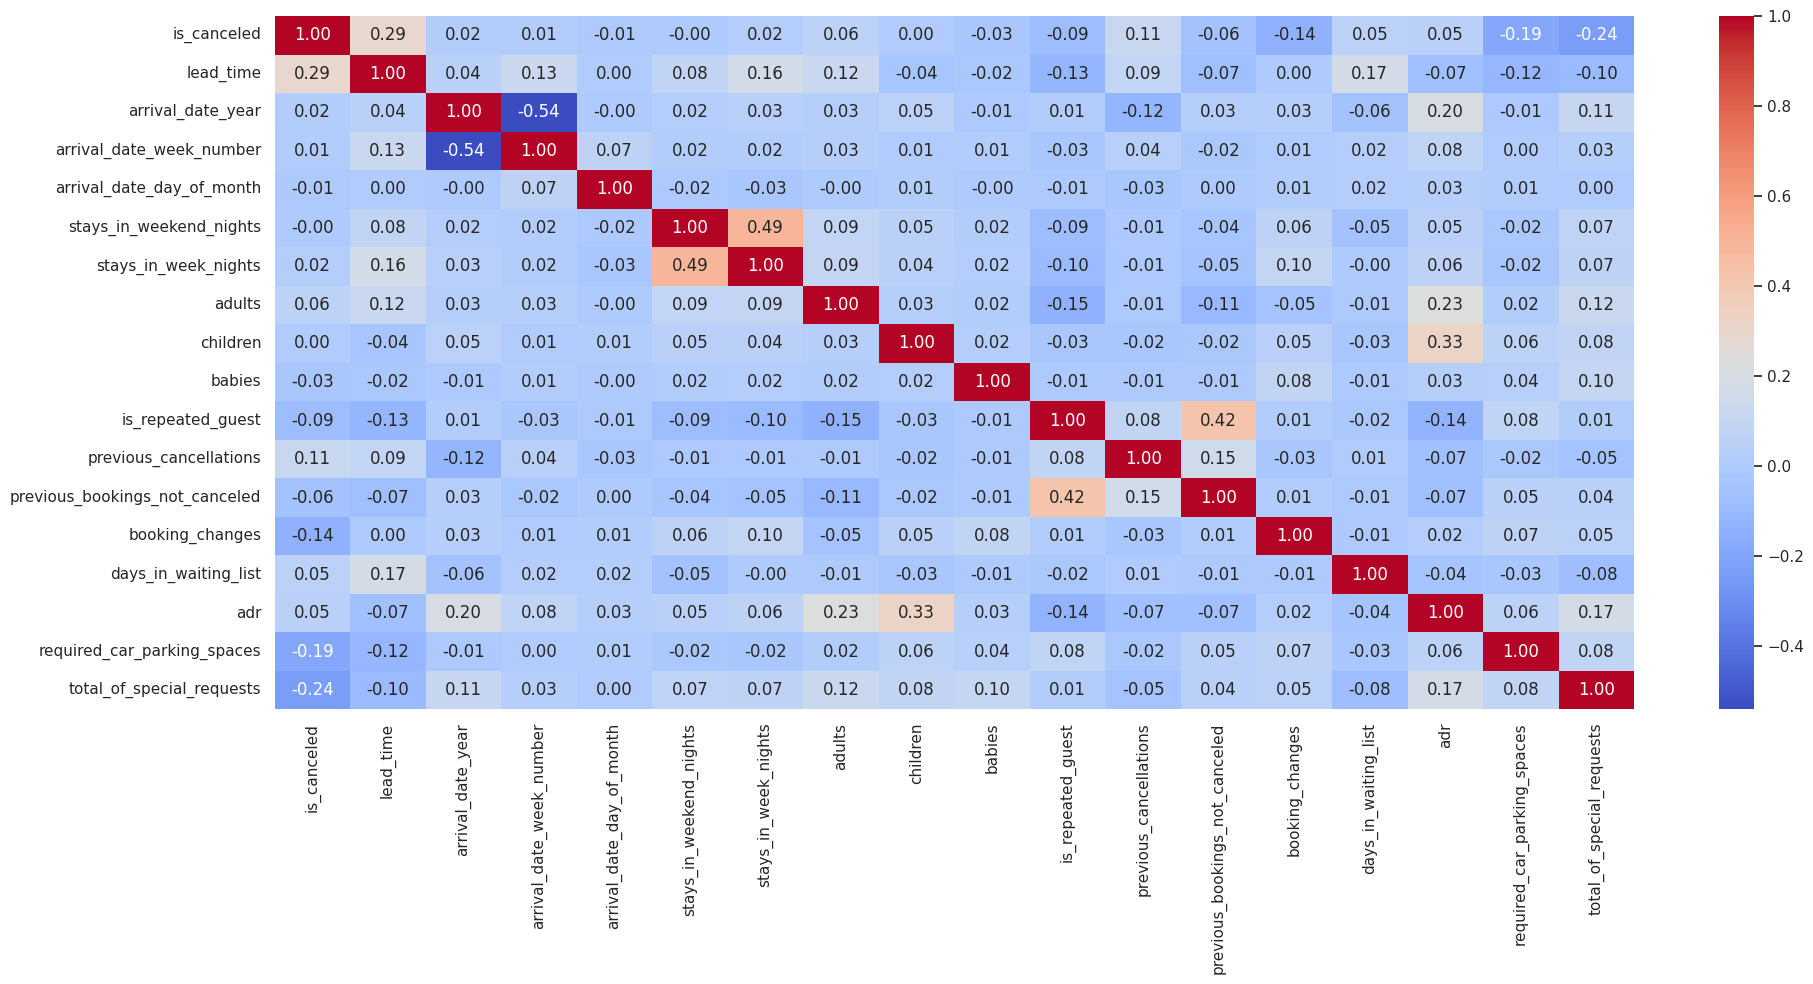

In [ ]:
if df_numeric.shape[1] >=4:
  plt.figure(figsize= (20,10))
  sns.heatmap(df_numeric.corr(), annot=True, fmt =".2f", cmap='coolwarm')
  plt.tight_layout()
  plt.show()
else:
  print("No enough data for heatmaps")

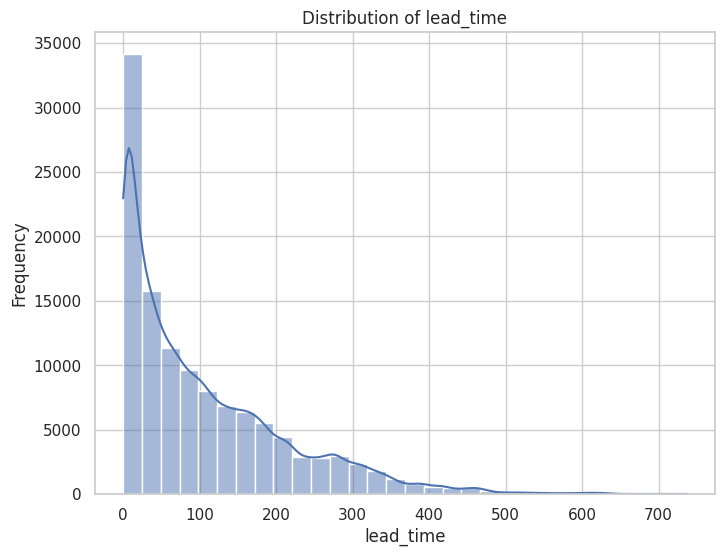

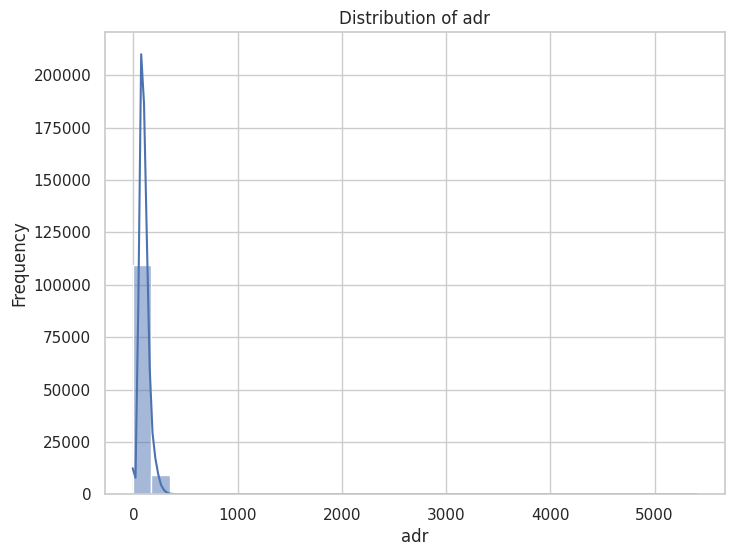

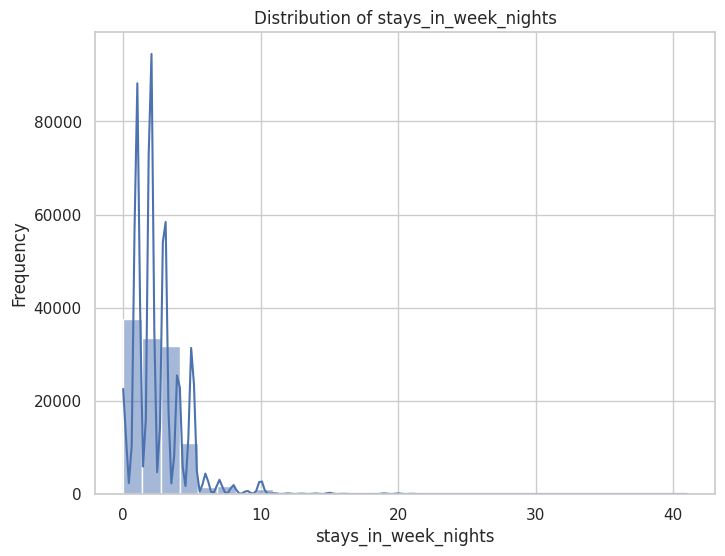

In [ ]:
features_plot = ['lead_time','adr', 'stays_in_week_nights']
for feature in features_plot:
  plt.figure(figsize=(8,6))
  sns.histplot(df_numeric[feature], bins = 30, kde = True)
  plt.title(f'Distribution of {feature}')
  plt.xlabel(feature)
  plt.ylabel('Frequency')
  plt.show()

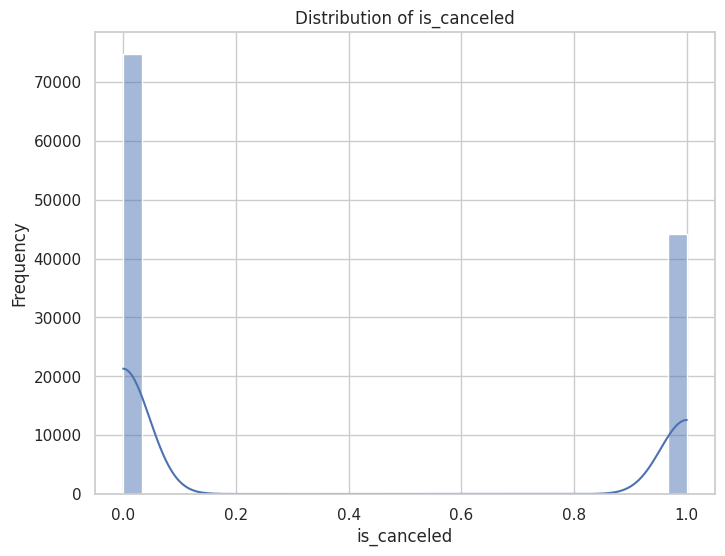

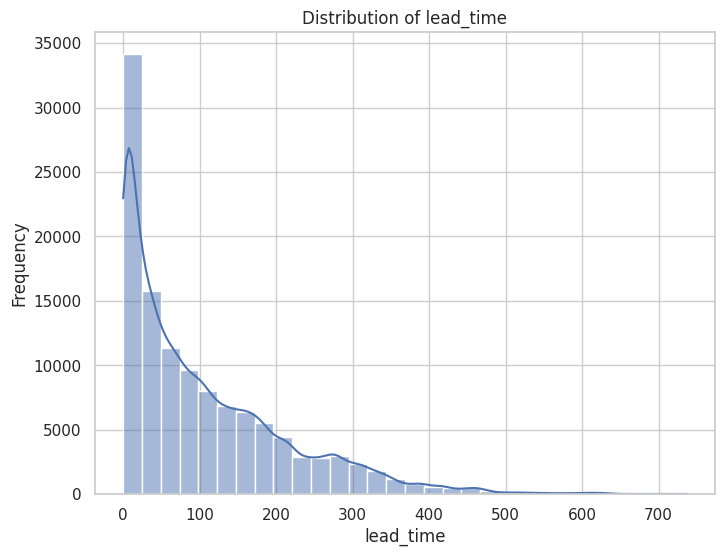

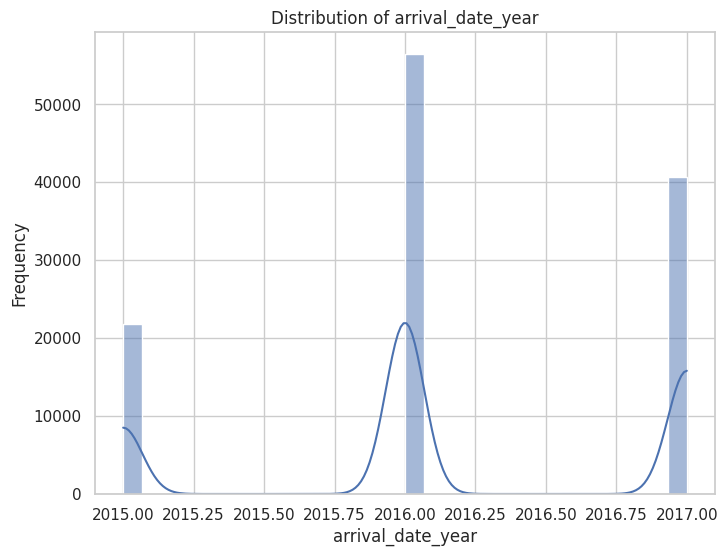

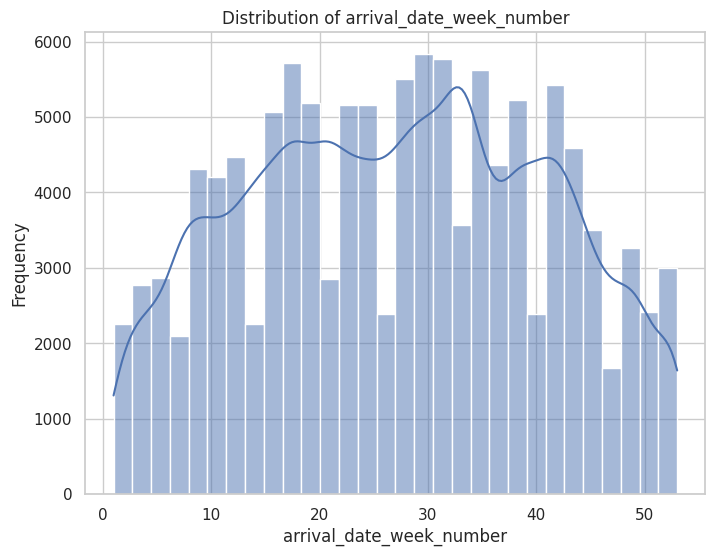

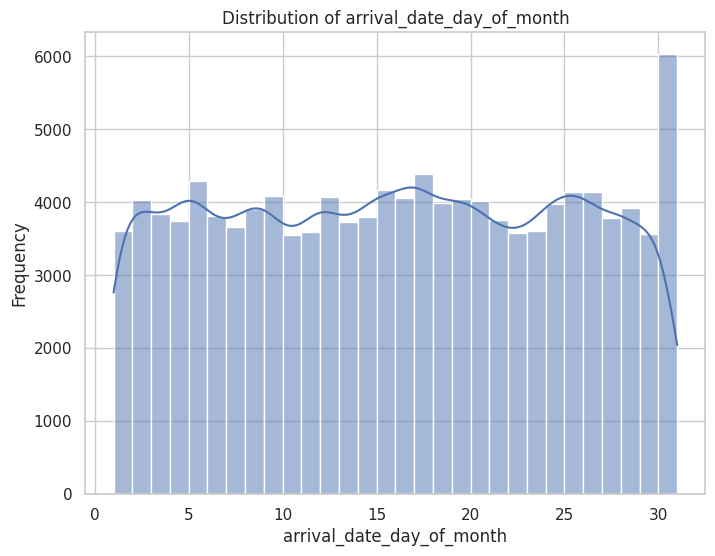

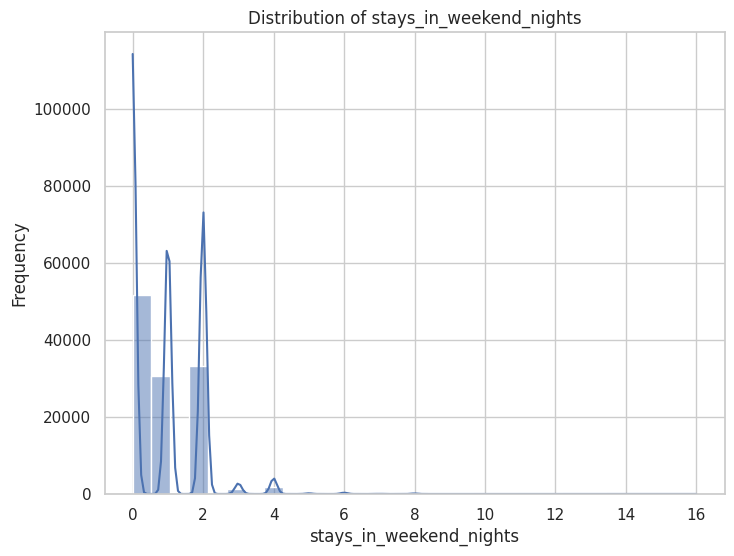

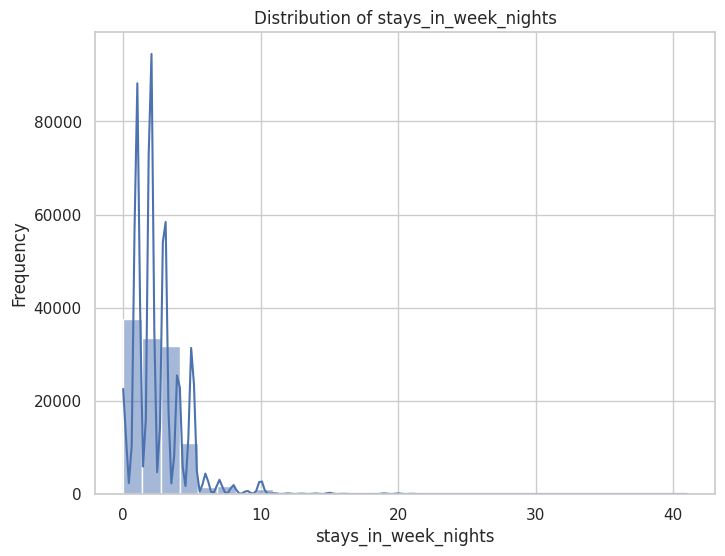

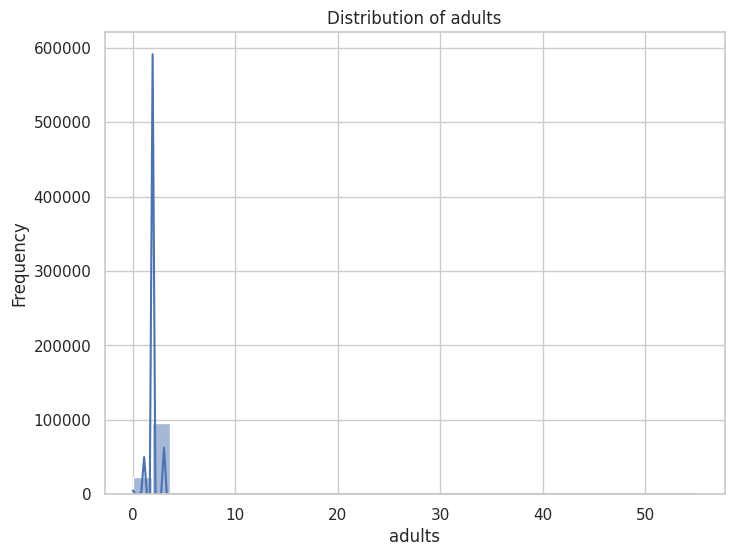

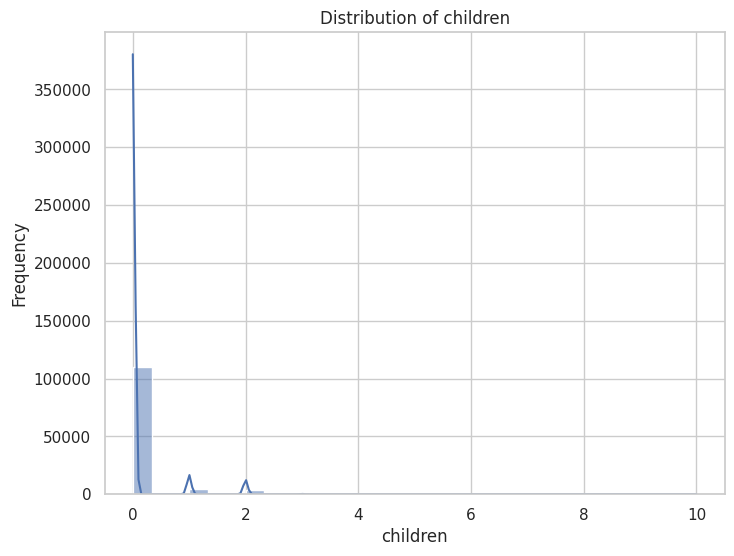

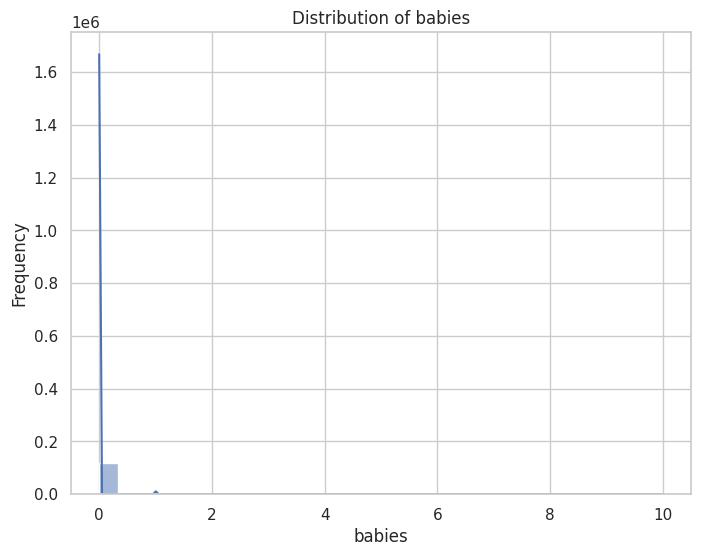

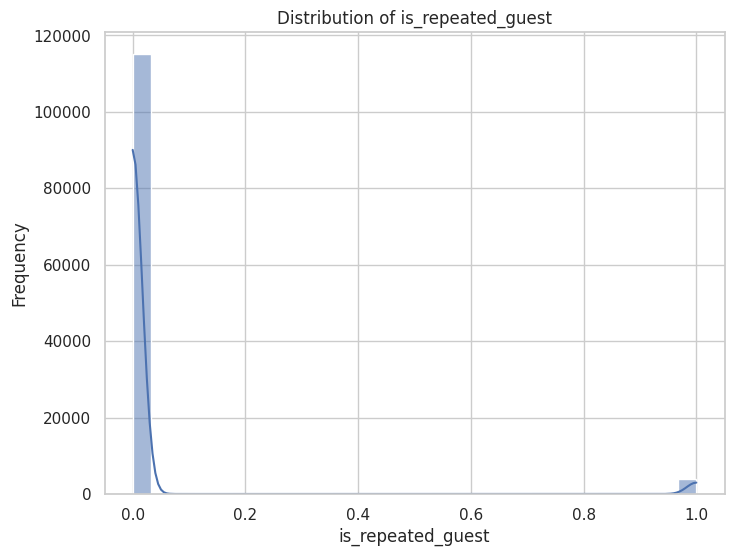

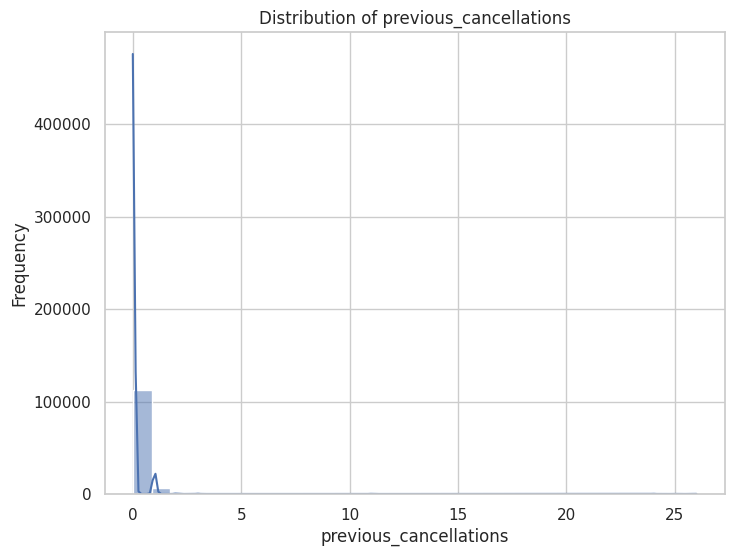

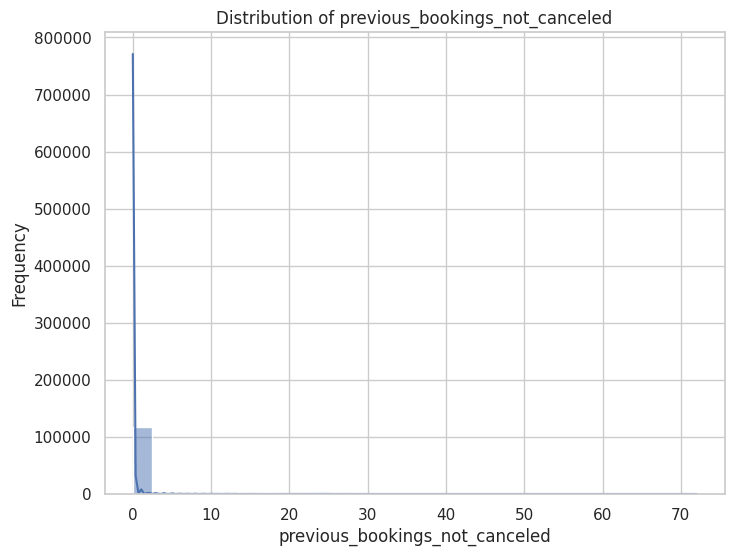

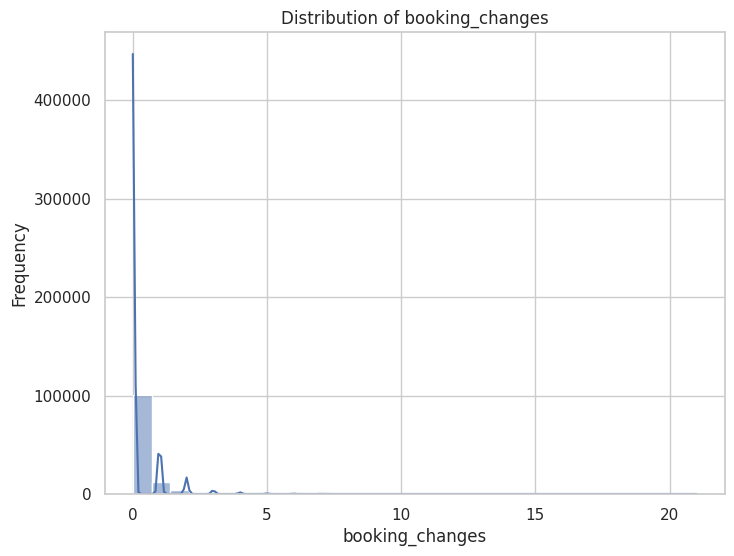

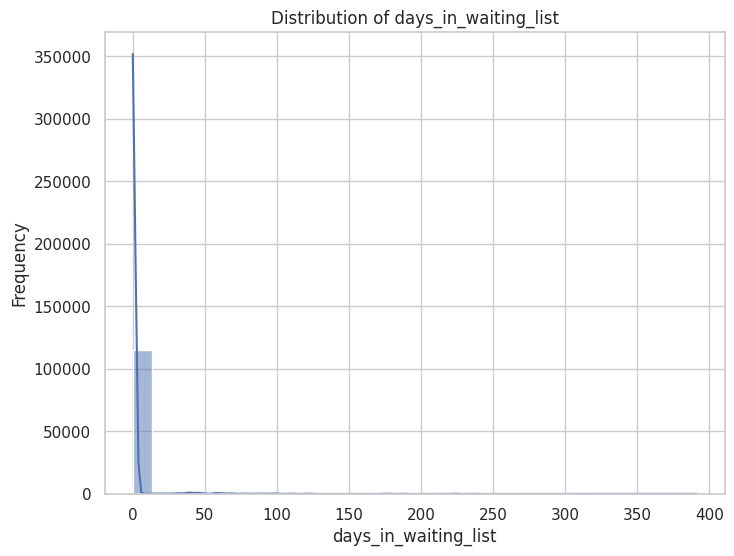

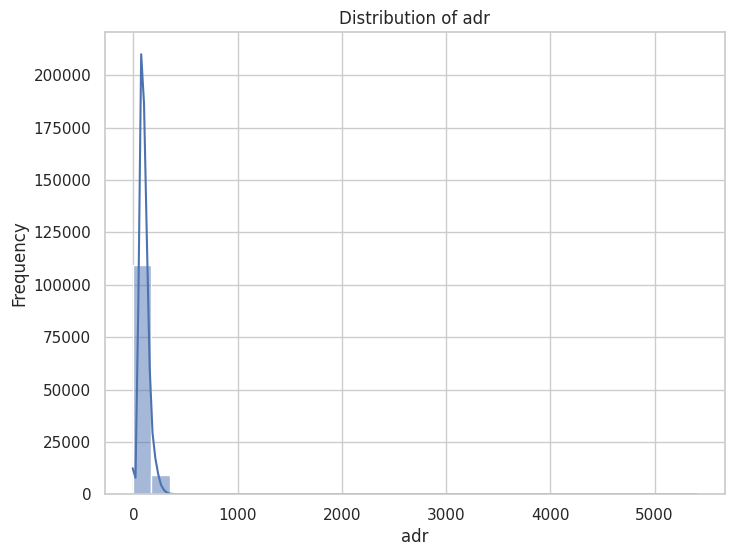

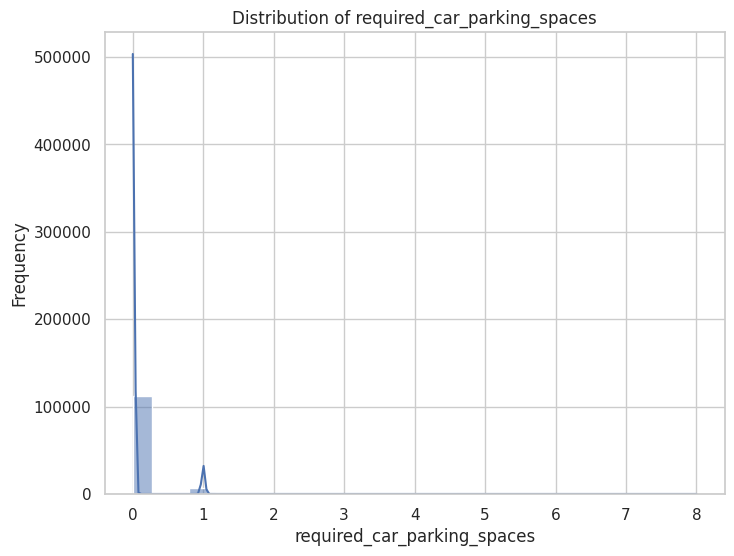

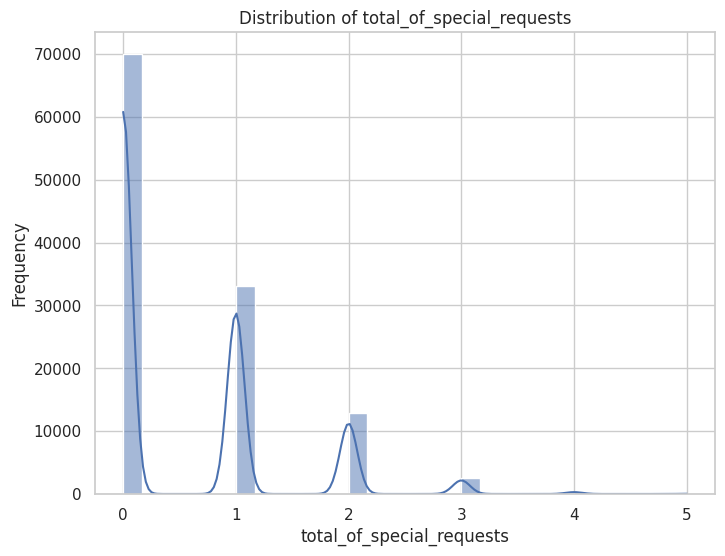

In [ ]:
features_plot = df_numeric.columns
for feature in features_plot:
  plt.figure(figsize=(8,6))
  sns.histplot(df_numeric[feature], bins = 30, kde = True)
  plt.title(f'Distribution of {feature}')
  plt.xlabel(feature)
  plt.ylabel('Frequency')
  plt.show()

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


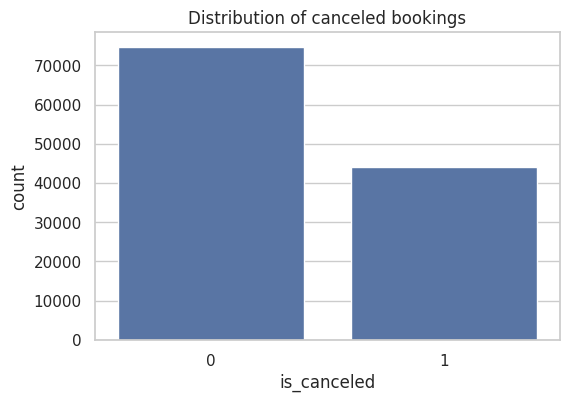

In [ ]:
# CountPlot is for category i.e 0 or 1 not for numerical
plt.figure(figsize= (6,4))
sns.countplot(data = df, x= 'is_canceled')
plt.title('Distribution of canceled bookings')
plt.show()

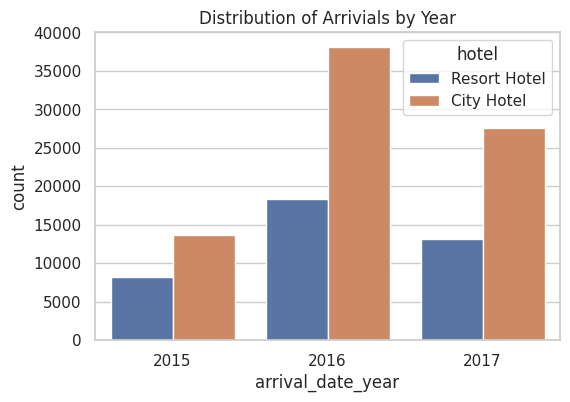

In [ ]:
plt.figure(figsize= (6,4))
sns.countplot(data = df, x= 'arrival_date_year', hue='hotel')
plt.title('Distribution of Arrivials by Year')
plt.show()

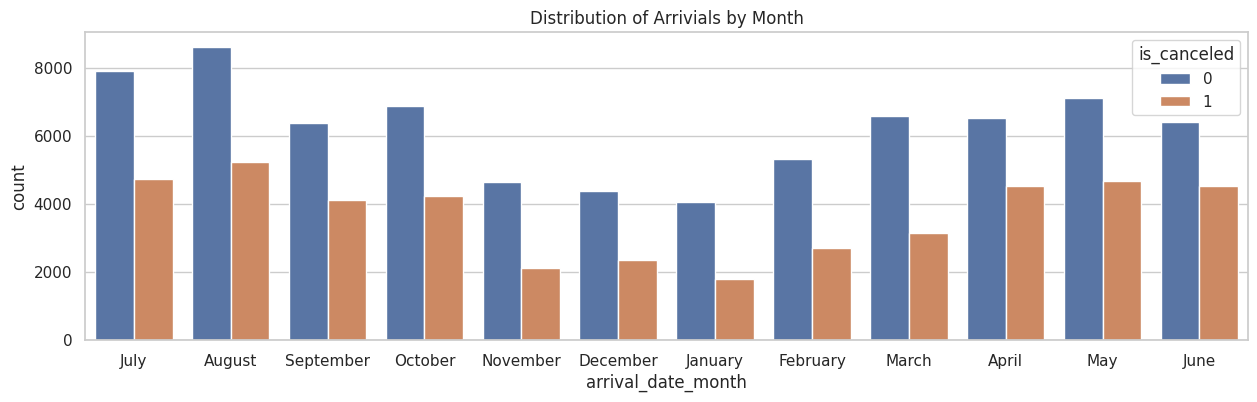

In [ ]:
plt.figure(figsize= (15,4))
sns.countplot(data = df, x= 'arrival_date_month', hue= 'is_canceled')
plt.title('Distribution of Arrivials by Month')
plt.show()

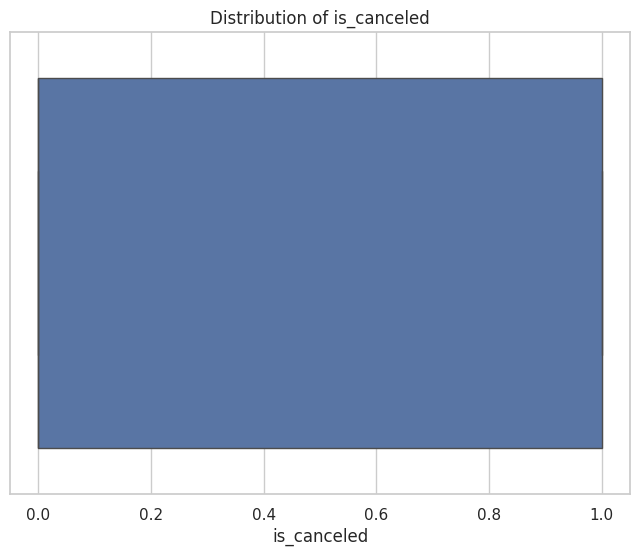

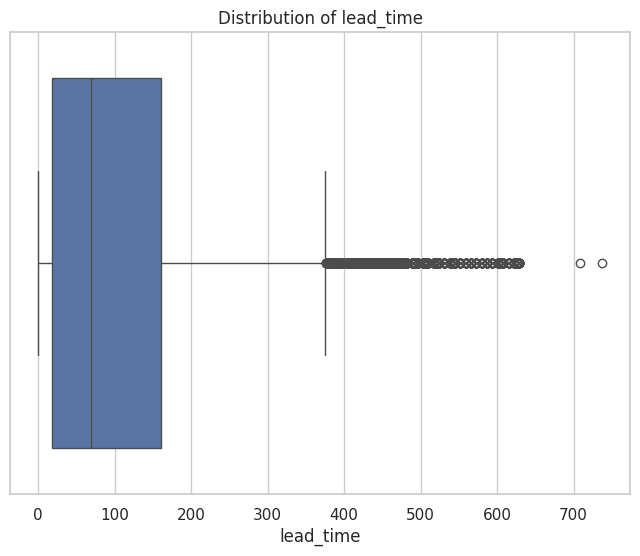

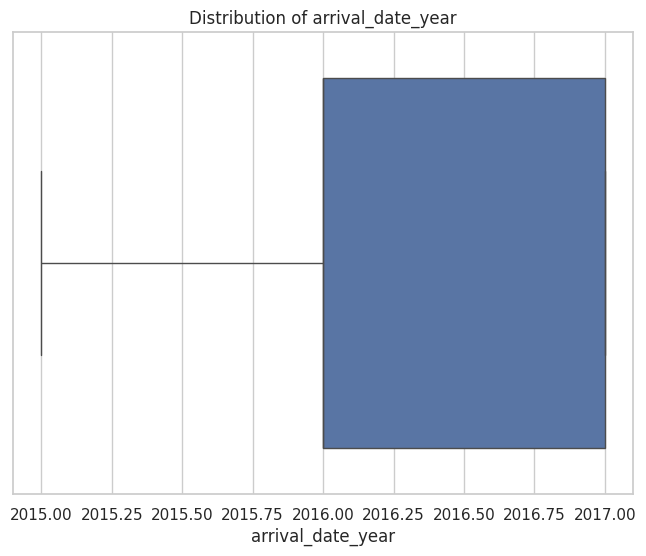

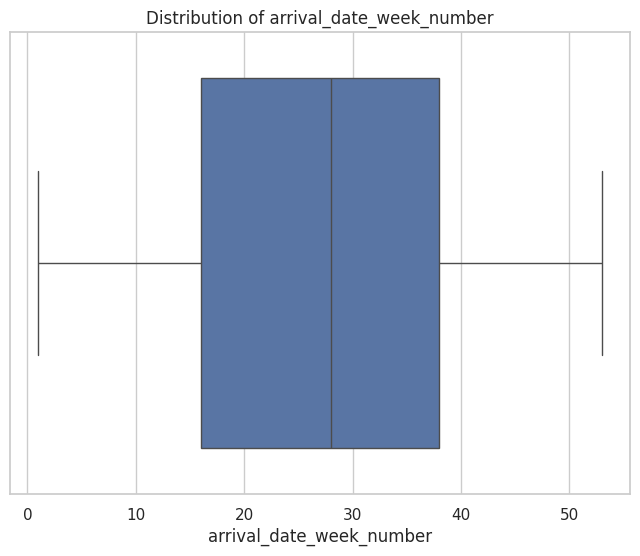

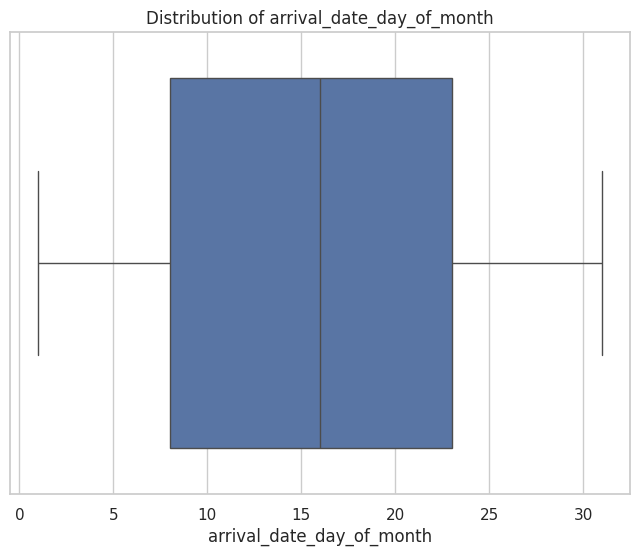

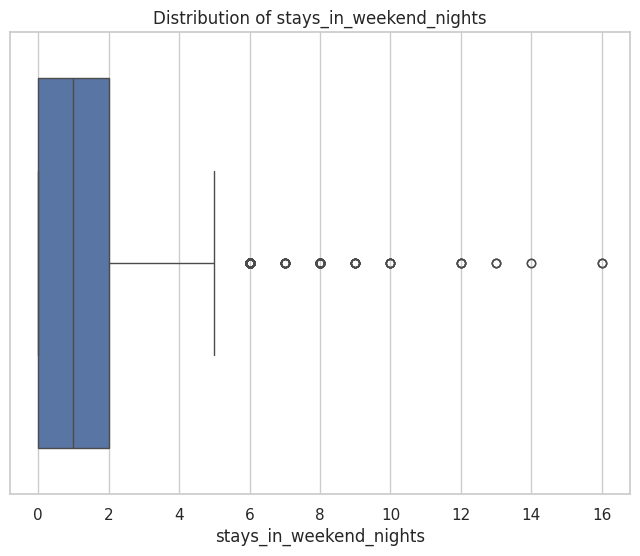

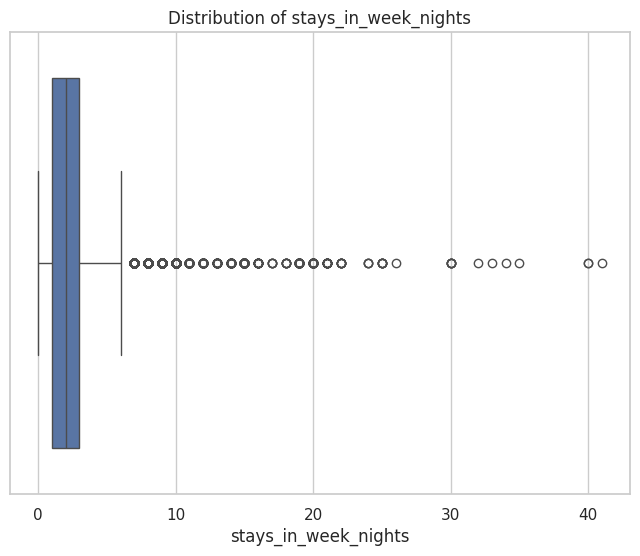

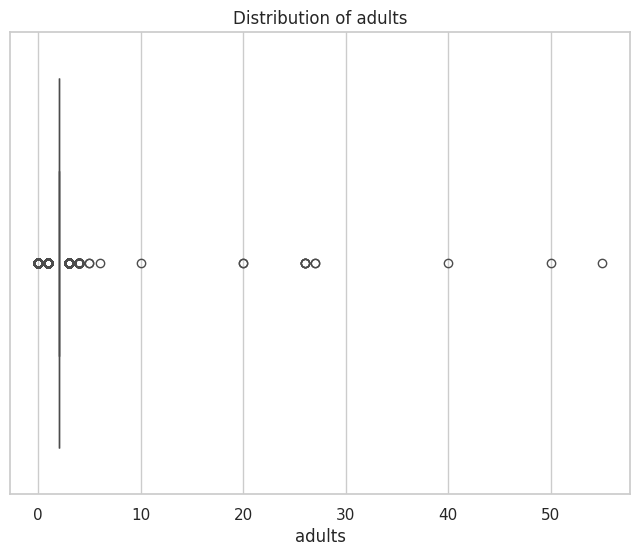

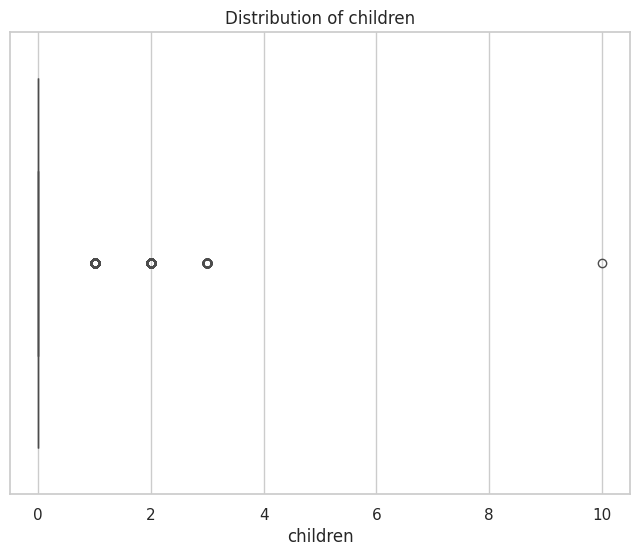

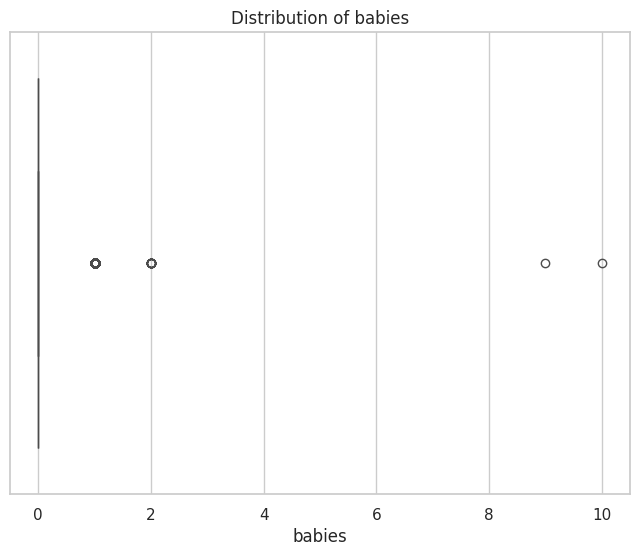

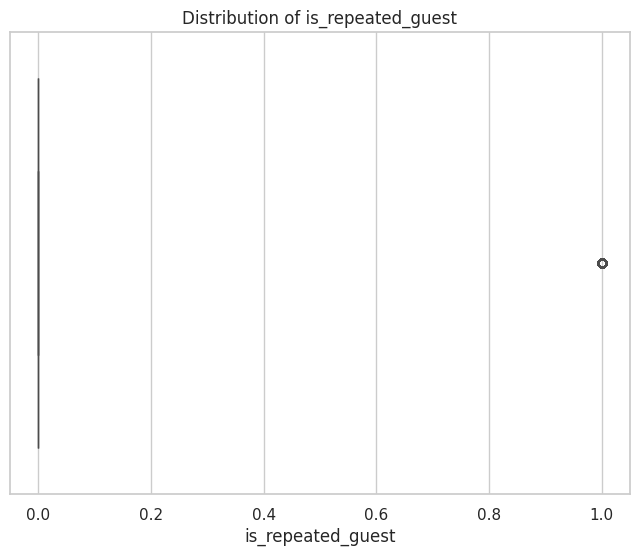

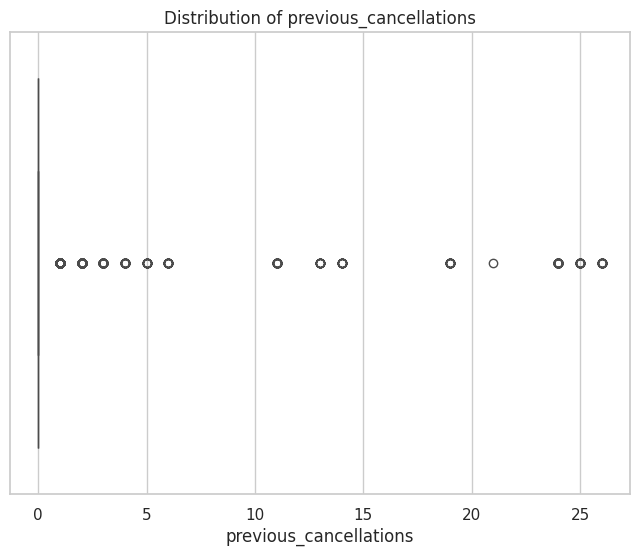

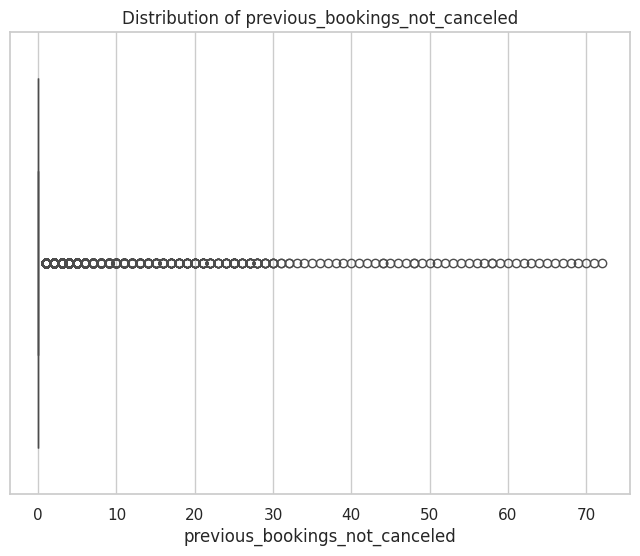

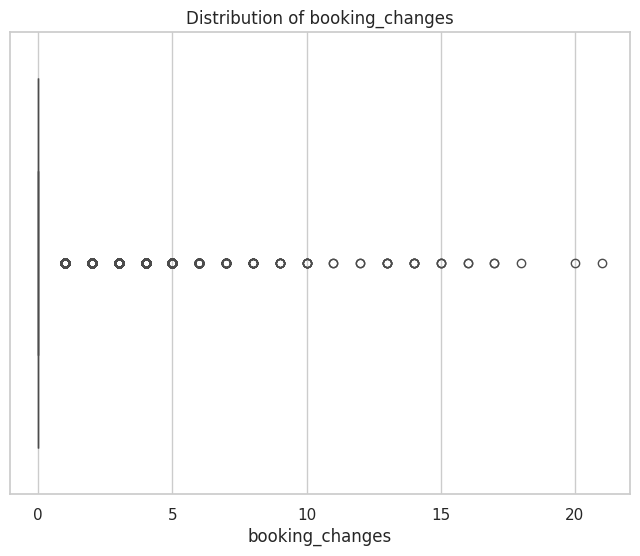

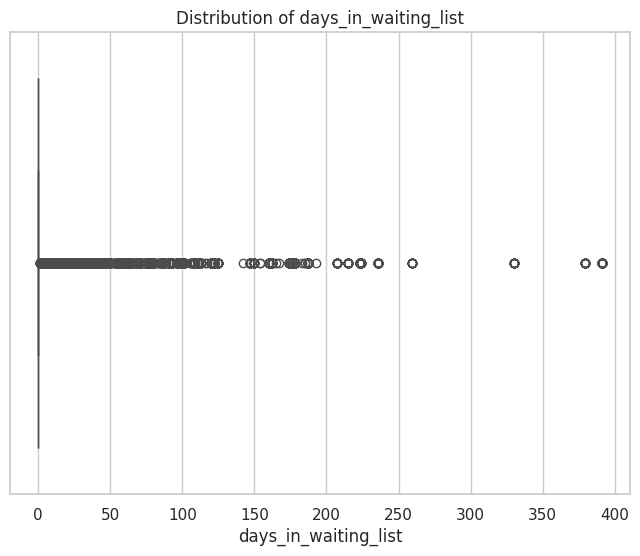

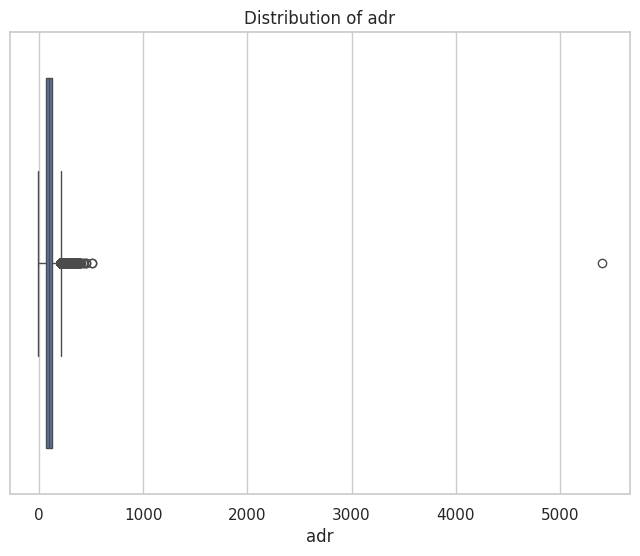

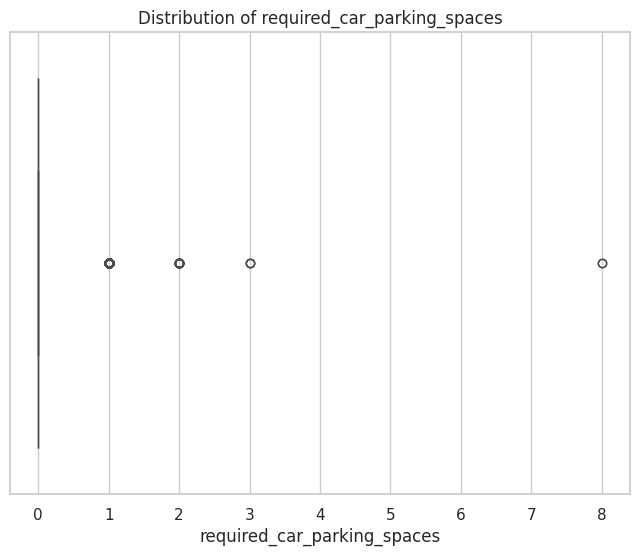

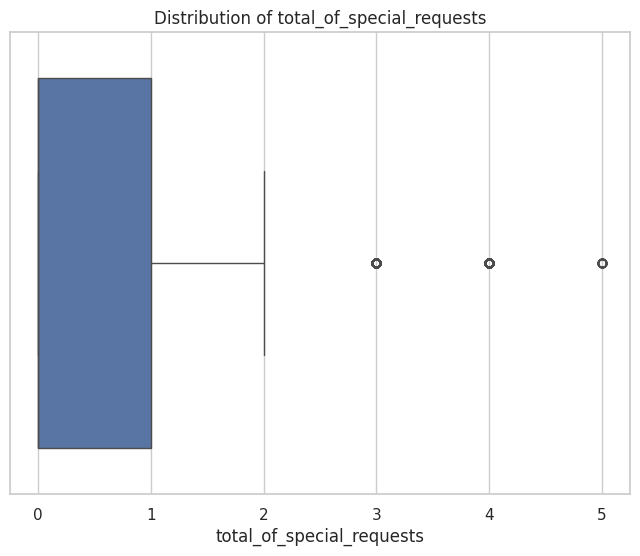

In [ ]:
# Box Plots
plot_features = df_numeric.columns
for feature in plot_features:
  plt.figure(figsize=(8,6))
  sns.boxplot(data = df_numeric, x = feature)
  plt.title(f'Distribution of {feature}')

Feature Engineering

In [ ]:
month_mapping = {month:index for index, month in enumerate([
    'January','February','March','April','May','June','July','August','September','October','November','December'
],1)}

In [ ]:
df['arrival_date_month_num'] = df['arrival_date_month'].map(month_mapping)

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,arrival_date_month_num
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322,7
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157,7
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734,7
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677,7
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498,7


In [ ]:
df['arrival_date'] = pd.to_datetime(
    df['arrival_date_year'].astype(str) + '-' +
    df['arrival_date_month_num'].astype(str) + '-' +
    df['arrival_date_day_of_month'].astype(str)
)

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,arrival_date_month_num,arrival_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322,7,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157,7,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734,7,2015-07-01
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677,7,2015-07-01
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498,7,2015-07-01


In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card', 'arrival_date_month_num',
       'arrival_date'],
      dtype='object')

In [ ]:
df['customer_type'].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

Creating the dummies - Changing the categorical values into (True or False)

In [ ]:
df.drop('arrival_date_year', axis=1, inplace=True)
df.drop('arrival_date_month', axis=1, inplace=True)
df.drop('arrival_date_month_num', axis=1, inplace=True)
df.drop('arrival_date_day_of_month', axis=1, inplace=True)
df.drop('arrival_date_week_number', axis=1, inplace=True)
df.drop('name', axis=1, inplace=True)
df.drop('email', axis=1, inplace=True)
df.drop('phone-number', axis=1, inplace=True)
df.drop('credit_card', axis=1, inplace=True)

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'arrival_date'],
      dtype='object')

In [ ]:
df.head()

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,Resort Hotel,0,342,0,0,2,0.0,0,BB,PRT,...,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
1,Resort Hotel,0,737,0,0,2,0.0,0,BB,PRT,...,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
2,Resort Hotel,0,7,0,1,1,0.0,0,BB,GBR,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
3,Resort Hotel,0,13,0,1,1,0.0,0,BB,GBR,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
4,Resort Hotel,0,14,0,2,2,0.0,0,BB,GBR,...,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118898 entries, 0 to 119389
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118898 non-null  object        
 1   is_canceled                     118898 non-null  int64         
 2   lead_time                       118898 non-null  int64         
 3   stays_in_weekend_nights         118898 non-null  int64         
 4   stays_in_week_nights            118898 non-null  int64         
 5   adults                          118898 non-null  int64         
 6   children                        118898 non-null  float64       
 7   babies                          118898 non-null  int64         
 8   meal                            118898 non-null  object        
 9   country                         118898 non-null  object        
 10  market_segment                  118898 non-null  object      

In [ ]:
# Create dummies for all the object data types columns in df
object_columns = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=object_columns, drop_first=True)

In [ ]:
df.head()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,...,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Check-Out,reservation_status_No-Show
0,0,342,0,0,2,0.0,0,0,0,0,...,False,False,False,False,False,False,True,False,True,False
1,0,737,0,0,2,0.0,0,0,0,0,...,False,False,False,False,False,False,True,False,True,False
2,0,7,0,1,1,0.0,0,0,0,0,...,False,False,False,False,False,False,True,False,True,False
3,0,13,0,1,1,0.0,0,0,0,0,...,False,False,False,False,False,False,True,False,True,False
4,0,14,0,2,2,0.0,0,0,0,0,...,False,False,False,False,False,False,True,False,True,False


In [ ]:
#map the TRUE and False to 1 and 0 in the data df
# Iterate through all columns in the DataFrame
for col in df.columns:
  # Check if the column's data type is boolean
  if df[col].dtype == bool:
    # Apply the mapping from True/False to 1/0
    df[col] = df[col].map({True: 1, False: 0})

# Display the head of the DataFrame to verify the changes
df.head()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,...,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Check-Out,reservation_status_No-Show
0,0,342,0,0,2,0.0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,737,0,0,2,0.0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,7,0,1,1,0.0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0,13,0,1,1,0.0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,0,14,0,2,2,0.0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [ ]:
df.head()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,...,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Check-Out,reservation_status_No-Show
0,0,342,0,0,2,0.0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,737,0,0,2,0.0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,7,0,1,1,0.0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0,13,0,1,1,0.0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,0,14,0,2,2,0.0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118898 entries, 0 to 119389
Columns: 235 entries, is_canceled to reservation_status_No-Show
dtypes: datetime64[ns](2), float64(2), int64(231)
memory usage: 214.1 MB


In [ ]:
features = [
    'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
    'adults', 'children', 'babies', 'previous_cancellations',
    'booking_changes', 'adr', 'total_of_special_requests',
]

In [ ]:
features = [feature for feature in features if feature in df.columns]

In [ ]:
x = df[features].fillna(0)
y = df['is_canceled']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([0, 0, 1, ..., 0, 0, 1])

Accuracy of a logistic regression must be above the 90 % here as we consider only some columns the accuracy is 71 %

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7192178301093356


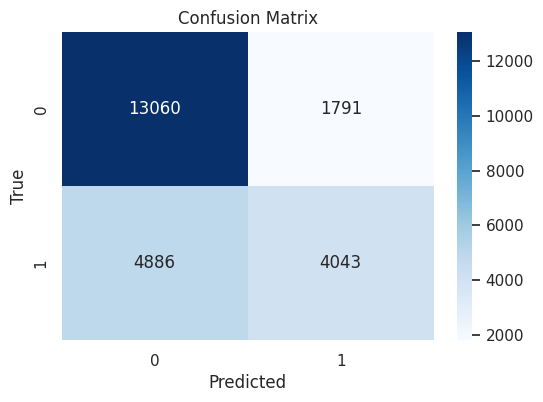

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

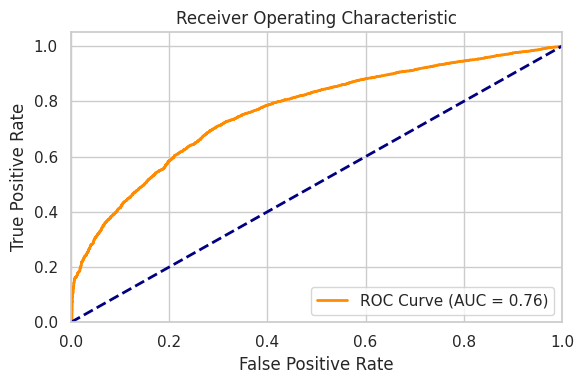

In [ ]:
#ROC Curve
y_prob = model.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [ ]:
# Coefficient of logistic regression
model_coefficients = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_[0]})
model_coefficients

,Feature,Coefficient
0,lead_time,0.005405
1,stays_in_weekend_nights,-0.008722
2,stays_in_week_nights,0.016558
3,adults,0.145197
4,children,0.022145
5,babies,0.001526
6,previous_cancellations,1.698932
7,booking_changes,-0.734050
8,adr,0.006100
9,total_of_special_requests,-0.752274


The Project is done but Now considering all the columns, in the previous for logistic regression we considered only some columns so the accuracy is about to 71 % if we consider all the columns then the accuracy will be 100 %

In [ ]:
y = df['is_canceled']
X = df.drop('is_canceled', axis =1)

In [ ]:
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [ ]:
# create dummies for all the object data type columns in df
object_columns = df.select_dtypes(include = ['object']).columns
df = pd.get_dummies(df, columns = object_columns, drop_first = True)

#map the TRUE and False to 1 and 0 in the data df
# Iterate through all columns in the DataFrame
for col in df.columns:
  # Check if the column's data type is boolean
  if df[col].dtype == bool:
    # Apply the mapping from True/False to 1/0
    df[col] = df[col].map({True: 1, False: 0})

# Display the head of the DataFrame to verify the changes
df.head()

df.info()

# Drop the datetime columns from the DataFrame as they are not suitable for Logistic Regression
df = df.drop(['reservation_status_date', 'arrival_date'], axis=1)

y = df['is_canceled']
X = df.drop('is_canceled', axis =1)

X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

model = LogisticRegression(max_iter = 5000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

y_pred

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6,4))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#ROC curve
y_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize = (6,4))
plt.plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.tight_layout()
plt.show()

# coefficients of logistic regression
model_coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
model_coefficients = model_coefficients.sort_values(by = 'Coefficient', ascending = False)

model_coefficients

<class 'pandas.core.frame.DataFrame'>
Index: 118898 entries, 0 to 119389
Columns: 235 entries, is_canceled to reservation_status_No-Show
dtypes: datetime64[ns](2), float64(2), int64(231)
memory usage: 214.1 MB
